## LINEAR REGRESSOON, RIDGE REGRESSION AND LASSO REGRESSION

### Preliminaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Install Yellowbrick to Visualization

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### Load Data

In [3]:
df = pd.read_csv('Advertising.csv')

### Explore Data

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

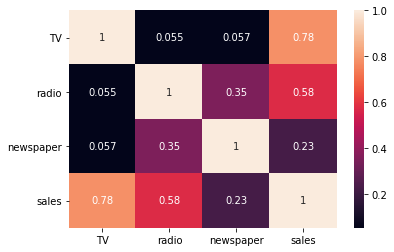

In [7]:
sns.heatmap(df.corr(), annot= True)

### Create the features matrix

In [8]:
X= df.drop(["sales"], axis = 1)

In [9]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Create the target vector

In [10]:
y = df["sales"]

### Create a function for evaluation metrics

In [11]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## 1. LINEAR REGRESSION

### Import Module

In [12]:
from sklearn.linear_model import LinearRegression

### Create the Linear Model

In [13]:
lm = LinearRegression()

### Split Into Training And Test Sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Fit the Model

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

### View Intercept Term

In [17]:
lm.intercept_

2.9948930304953283

### View Coefficients

In [18]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
TV,0.044584
radio,0.196497
newspaper,-0.002781


### Predict the test set

In [19]:
y_pred = lm.predict(X_test)

### Evaluate model performance

In [20]:
eval_metrics(y_test, y_pred)

r2_score: 0.8601145185017869 
 mae: 1.3617813502090272 
 mse: 4.402118291449684 
 rmse: 2.09812256349568


### Compare the actual and predicted values

In [21]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [22]:
compare.sample(10)

,Actual,Pred
122,11.6,13.409916
145,10.3,9.598342
5,7.2,12.782869
107,8.7,7.019708
177,11.7,12.017863
80,11.8,11.585556
106,7.2,6.188351
45,14.9,15.135122
7,13.2,12.172969
152,16.6,16.343580


### Visualize the Prediction Errors

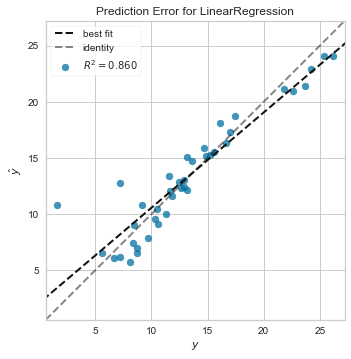

In [23]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [24]:
lm.score(X_test,y_test)

0.8601145185017869

### Visualize the Residuals

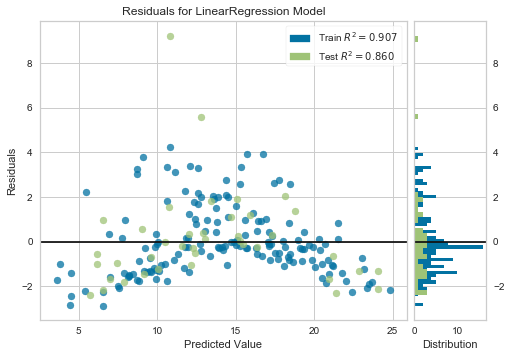

In [25]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Model score with Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832984266379699

In [27]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
-accuraries.mean()

2.611232315558323

### 2. RIDGE REGRESSION

### Import Module

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

### Standardize Features

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [32]:
X_train = scaler.transform(X_train)

In [33]:
a = pd.DataFrame(X_train, columns = X.columns)

In [34]:
a.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


### Create the Ridge Model

In [35]:
ridge_model = Ridge()

### Fit the model and predict the test set

In [36]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

### Evaluate the model

In [37]:
eval_metrics(y_test, y_pred)

r2_score: -13616.183152418762 
 mae: 564.2031862605517 
 mse: 428525.1792484898 
 rmse: 654.618346251073


In [38]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.883606729382136

In [39]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [40]:
ridge_model.alpha

1.0

In [41]:
ridge_model = Ridge(3).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -13297.587087052745 
 mae: 557.732594942924 
 mse: 418499.13829048263 
 rmse: 646.9150935713918


In [42]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

### Searching for best alpha value

In [43]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [44]:
# best alpha
ridgecv.alpha_

3.7181818181818183

### Finding the best alpha value with Yellowbrick

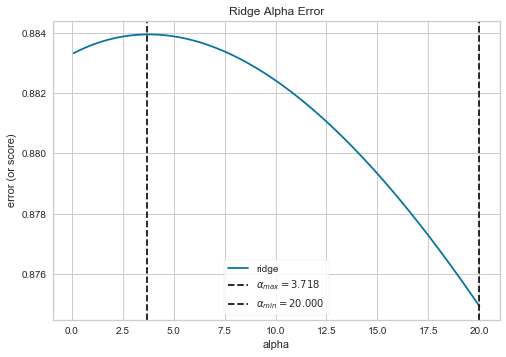

In [45]:
#let's find the same alpha with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show();

### Training the model with best alpha value

In [46]:
ridge_model = Ridge(3.7).fit(X_train, y_train)

In [47]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8839572574970613

In [48]:
accuraries

array([0.8880503 , 0.90740564, 0.93623229, 0.85756682, 0.8992068 ,
       0.93309777, 0.80879463, 0.92541755, 0.75638439, 0.92741638])

### Feature Importance with Yellowbrick

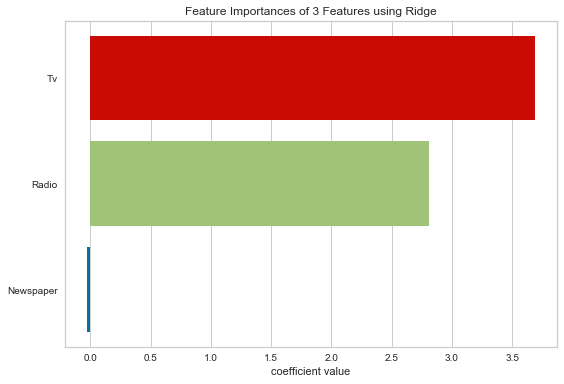

In [49]:
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

In [50]:
ridge_model.coef_

array([ 3.6900482 ,  2.814495  , -0.02611704])

### 3. LASSO REGRESSION

### Import Module

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

### Create the Model, Fit the Model, Predict the Test Set and Evaluate the Model

In [52]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -7510.215912900161 
 mae: 418.89243176289494 
 mse: 236373.7866651165 
 rmse: 486.1828736855264


In [53]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8155099608241121

In [54]:
lasso_model.alpha

1.0

### Searching for best alpha value and training the model with best alpha value

In [55]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [56]:
lasso_cv_model.alpha_

0.1

### Selection of best alpha value with Yellowbrick

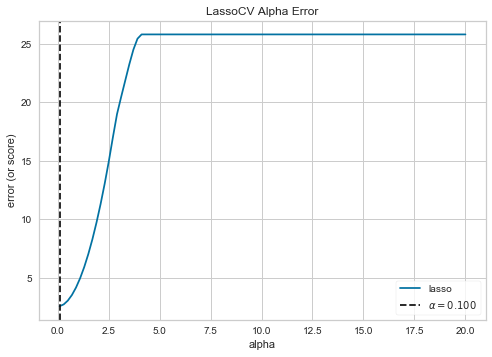

In [57]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

### Train the model with best alpha value, Predict the test set, Evaluate the model

In [58]:
lasso_model = Lasso(0.1).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -13078.84744302051 
 mae: 553.2894816233063 
 mse: 411615.5233667152 
 rmse: 641.5726953095145


In [59]:
lasso_model = Lasso(0.01).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: -13711.066903023799 
 mae: 566.198948516718 
 mse: 431511.1181009441 
 rmse: 656.8950586668651


In [60]:
# cv score when alpha is 0.1
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8836707083877627

In [61]:
lasso_model = Lasso(3).fit(X_train, y_train)

### Feature Importance with Yellowbrick

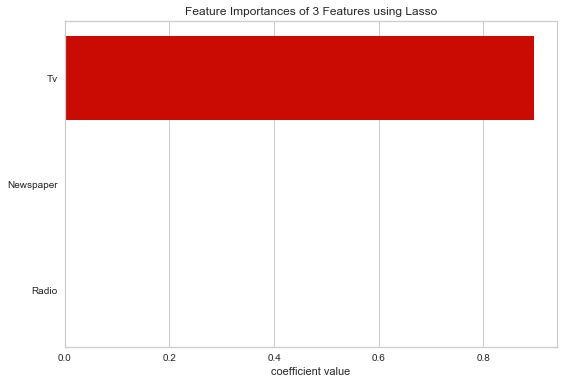

In [62]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();